In [10]:
""" reference: http://soonraah.hatenablog.com/entry/2014/08/23/145938 
"""
# how to install gcc in your mac
# https://qiita.com/wawawa/items/50c2c612b0937f28d92b

' reference: http://soonraah.hatenablog.com/entry/2014/08/23/145938 \n'

In [1]:
import pystan

In [2]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    vector[J] y; // estimated treatment effects
    vector<lower=0>[J] sigma; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    vector[J] eta;
}
transformed parameters {
    vector[J] theta;
    theta =  mu + tau * eta;
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {"J": 8,
               "y": [28, 8, -3, 7, -1, 1, 18, 12],
               "sigma": [15, 10, 16, 11, 9, 11, 10, 18]}

sm = pystan.StanModel(model_code=schools_code)
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b2e78c33a1c3c07e58e2510dfc96d900 NOW.


In [3]:
print(fit)

Inference for Stan model: anon_model_b2e78c33a1c3c07e58e2510dfc96d900.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         7.77    0.13   4.79  -1.56    4.5   7.72  10.85  17.45   1296    1.0
tau        6.06    0.16   5.05   0.16   2.13   5.02   8.81   17.8   1002    1.0
eta[1]     0.38    0.02   0.93  -1.41  -0.24   0.38   1.03   2.14   2034    1.0
eta[2]     0.02    0.02   0.89  -1.68  -0.57   0.02   0.62   1.75   2512    1.0
eta[3]    -0.17    0.02   0.89  -1.92  -0.77  -0.16   0.42   1.55   2088    1.0
eta[4]  -4.6e-3    0.02   0.89  -1.78  -0.58 4.9e-3   0.56   1.76   2344    1.0
eta[5]    -0.36    0.02   0.91  -2.16  -0.95  -0.38   0.23   1.48   1555    1.0
eta[6]    -0.21    0.02   0.87  -1.81  -0.79  -0.24   0.34   1.55   2162    1.0
eta[7]     0.31    0.02   0.91  -1.54  -0.26   0.34   0.94   2.01   2288    1.0
eta[8]     0.

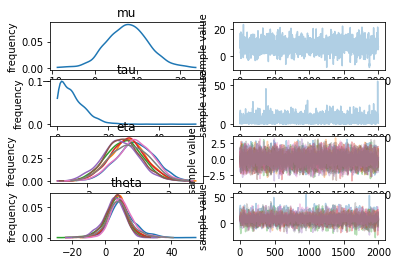

In [10]:
fit.plot().show();